<h1> <Big> Credit Card-Segmentation Case Study 

## 1. Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set({'figure.figsize':(10,8)})

In [3]:
writer=pd.ExcelWriter('CC_Segmentation.xlsx')

## 2. Data pre-processing

In [4]:
credit=pd.read_csv('CC_GENERAL.csv')
credit.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

<big> 
- credit limit has 1 missing value
    
- minimum payment has 313 missing values

In [6]:
import pandas_profiling as pp

In [7]:
#report=pp.ProfileReport(credit)
#report.to_file(outputfile='pandas_report_credit.html')

In [8]:
#report

<big> 
- MINIMUM_PAYMENTS has 313 / 3.5% missing values Missing
- ONEOFF_PURCHASES is highly correlated with PURCHASES

## 3. Creating all necessary KPI's as part of data: 

- Monthly_avg_purchase=PURCHASES/TENURE

- Monthly_cash_advance= CASH_ADVANCE/TENURE

<strong> <big> There are 4 broad types of purchase behaviour in the data set: </strong> 

1. People who only do One-Off Purchases.
2. People who only do Installments Purchases.
3. People who do both.
4. People who do none

In [9]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
credit['Monthly_cash_advance']= credit['CASH_ADVANCE']/credit['TENURE']
credit['limit_usage']= credit['BALANCE']/credit['CREDIT_LIMIT']
credit['payment_minpay']=credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']

<h3> Note to remember: </h3> <br />
payment_minpay is the ratio of payed amount to due amount in a given time peroid. Higher value indicates, customer is paying dues. 

limit_usage= BALANCE/CREDIT_LIMIT <br />
  {Lower value means good credit score}

In [10]:
credit.loc[(credit.ONEOFF_PURCHASES==0) & (credit.INSTALLMENTS_PURCHASES==0),'purchase_type']='None'
credit.loc[(credit.ONEOFF_PURCHASES>0) & (credit.INSTALLMENTS_PURCHASES==0) , 'purchase_type']= 'One_Of'
credit.loc[(credit.ONEOFF_PURCHASES==0) & (credit.INSTALLMENTS_PURCHASES>0) , 'purchase_type']= 'Installment_Purchases'
credit.loc[(credit.ONEOFF_PURCHASES>0) & (credit.INSTALLMENTS_PURCHASES>0), 'purchase_type']= 'Both'

In [11]:
credit.to_excel(writer, 'Credit_Kpi', index=True)
credit.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,Installment_Purchases
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,One_Of
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,NaN,One_Of
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,One_Of


### UDFs to return numerical and categorical data summary

In [12]:
# Create Data audit Report for continuous variables
def cont_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

# Create Data audit Report for categorical variables

def cat_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [13]:
Numerical_summ=credit.select_dtypes(include=['int','float']).apply(cont_var_summary).T
Numerical_summ.to_excel(writer, 'Conti_summary', index=True)
Numerical_summ

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


<big> 
- There are outliers in the data

In [14]:
credit_num=credit.select_dtypes(['int64','float64', 'int32', 'float32'])

In [15]:
credit_num.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
Monthly_avg_purchase                  0
Monthly_cash_advance                  0
limit_usage                           1
payment_minpay                      313
dtype: int64

### Filling Missing Values with median

In [16]:
credit_num['CREDIT_LIMIT'].fillna(credit_num['CREDIT_LIMIT'].median(),inplace=True)
credit_num['MINIMUM_PAYMENTS'].fillna(credit_num['MINIMUM_PAYMENTS'].median(),inplace=True)
credit_num['limit_usage'].fillna(credit_num['limit_usage'].median(),inplace=True)
credit_num['payment_minpay'].fillna(credit_num['payment_minpay'].median(),inplace=True)
credit
print (credit_num.isnull().sum())

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
dtype: int64


In [17]:
credit_cat=credit.select_dtypes(['object','O'])
credit_cat.drop(columns='CUST_ID',inplace=True,axis=1)
credit_cat.head()

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,purchase_type
0,Installment_Purchases
1,None
2,One_Of
3,One_Of
4,One_Of


In [18]:
credit=pd.concat([credit_num,credit_cat],axis=1)
credit.to_excel(writer, 'CC_Miss_treated', index=True)
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
purchase_type                       0
dtype: int64

In [19]:
%matplotlib inline
sns.set({'figure.figsize':(7,5)})
sns.set(font_scale=1.5, palette='Accent_r')

Text(0.5, 1.0, 'Mean minpayment ratio for each purchse type')

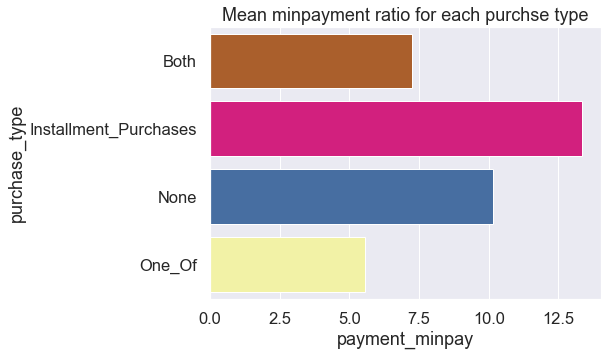

In [26]:
graph=credit.groupby('purchase_type').agg({'payment_minpay':'mean'}).reset_index()
chart1=sns.barplot(data=graph, y='purchase_type', x='payment_minpay')
plt.title('Mean minpayment ratio for each purchse type')

<big> <big> Insight 1: Customers who do Installment purchases are paying dues 

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type')

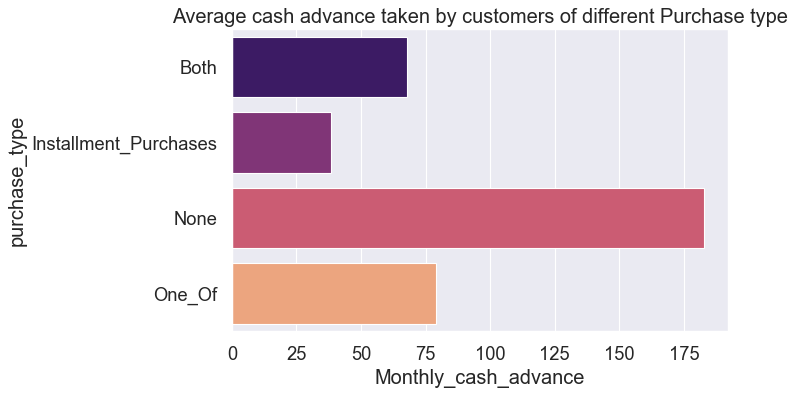

In [27]:
plt.figure(dpi=80, figsize=(8,5))

df=credit.groupby('purchase_type').agg({'Monthly_cash_advance':'mean'}).reset_index()

sns.barplot(data=df, y='purchase_type', x='Monthly_cash_advance', palette = 'magma')
plt.title('Average cash advance taken by customers of different Purchase type')

<big> <big> Insight2: Customers who don't do either one-off or installment purchases take more cash on advance

## Let's check the status for credit score

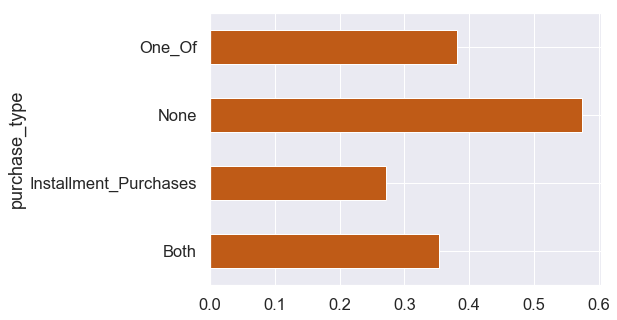

In [28]:
credit.groupby('purchase_type').mean()['limit_usage'].plot.barh()

<big> <big> Insight 3: Customers doing Installment purchases have maintained a good credit score 

In [29]:
# original credit df with categorical converted to dummies
credit_original=pd.concat([credit,pd.get_dummies(credit_cat['purchase_type'])],axis=1)

## Outlier Treatment

In [30]:
credit=credit.select_dtypes(['int64','float64', 'int32', 'float32']).apply(lambda x: x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95)))
credit.to_excel(writer, 'Outliers_treated', index=True)

In [31]:
# Let us keep a few important columns
credit_col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']

credit_imp=credit[[x for x in credit.columns if x not in credit_col]]


In [32]:
credit_dummy=pd.concat([credit_imp,pd.get_dummies(credit_cat['purchase_type'])],axis=1)


In [33]:
corrm=credit_dummy.corr()
corrm.to_excel(writer, 'corr_matrix', index=True)

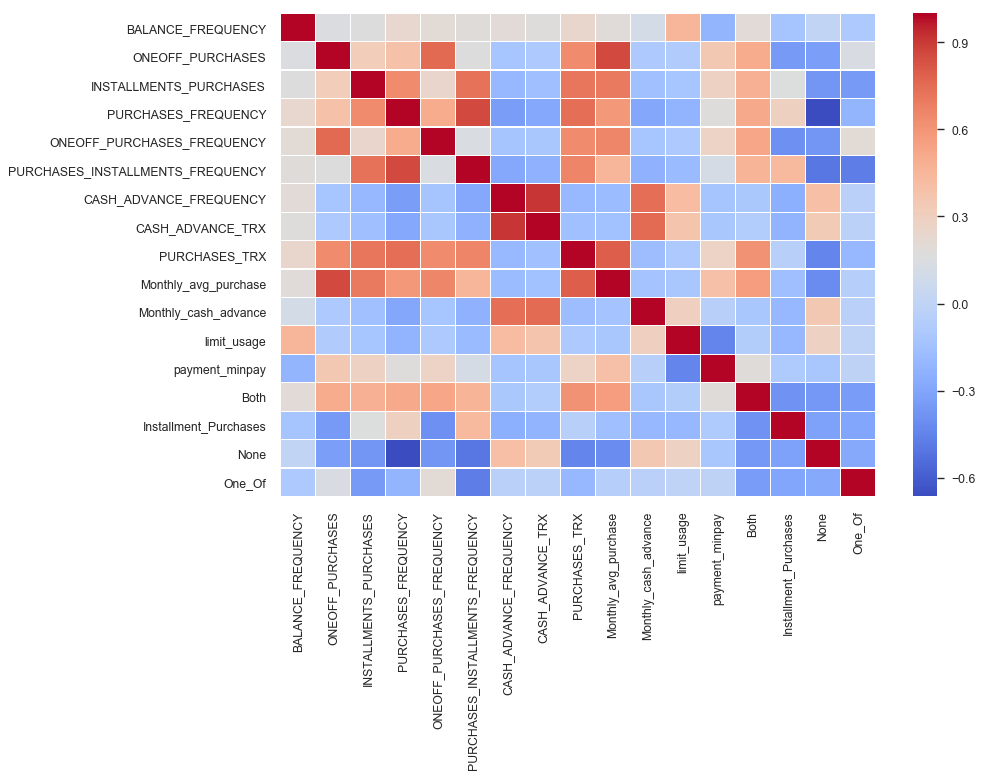

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 8),dpi=80)
sns.heatmap(credit_dummy.corr(), cmap='coolwarm',linewidth=0.2)

### Before applying PCA we will standardize data to avoid effect of scale on our result.

In [35]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_scaled=sc.fit_transform(credit_dummy)
cr_scaled.shape

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(8950, 17)

In [36]:
from sklearn.decomposition import PCA

In [37]:
var_ratio={}
for c in range(2,18):
    pc=PCA(n_components=c)
    pca=pc.fit(cr_scaled)
    var_ratio[c]=sum(pca.explained_variance_ratio_)

In [38]:
print(var_ratio)

{2: 0.5297647836628148, 3: 0.6611489147241364, 4: 0.7464480110286232, 5: 0.8135572499146477, 6: 0.855799070016741, 7: 0.8874188765279774, 8: 0.9153198413706426, 9: 0.9365070448243764, 10: 0.9549899000539034, 11: 0.9721610043636222, 12: 0.9831124338866234, 13: 0.9914998557569273, 14: 0.9962597809189867, 15: 0.9986227040975837, 16: 1.0, 17: 1.0}


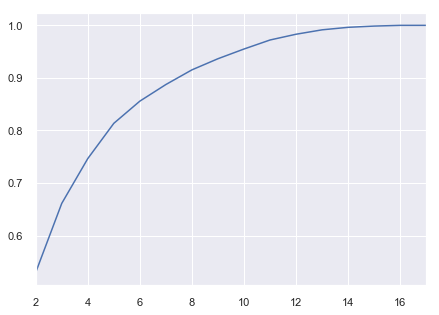

In [39]:
pd.Series(var_ratio).plot()

- <big> 6 componenents can explain 84% variance and
- 7 componenets can explain 88% variance, 
-  8 components can explain 91% variancee in the data

In [40]:
# startingg off with 8 components, do not want to loose a lot of variance choosing 5 or 6 components
pc_final=PCA(n_components=8).fit(cr_scaled)
reduced_cr=pc_final.fit_transform(cr_scaled)
df=pd.DataFrame(reduced_cr)

In [41]:
df.head()

,0,1,2,3,4,5,6,7
0,-1.061588,-2.450144,-0.249233,-0.051818,0.211910,0.004788,-0.101276,-0.697283
1,-3.182093,1.400298,-0.433445,1.108182,-0.567546,0.301950,-0.196392,-0.306963
2,0.859283,0.028670,2.481261,-2.083488,1.053096,-0.110747,-0.959542,-0.878937
3,-0.714329,-0.539490,2.697378,-0.337359,0.811421,0.167349,1.263549,-0.047714
4,-1.604835,-0.785440,1.567451,-1.881393,0.333662,0.327835,-0.018806,1.269360


In [43]:
eign_values=pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(8)],index=credit_dummy.columns)
eign_values.to_excel(writer, 'PCA_eigen', index=True)
eign_values

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
BALANCE_FREQUENCY,0.063788,0.267285,-0.210789,-0.465506,-0.069609,0.302094,-0.642175,0.159790
ONEOFF_PURCHASES,0.274651,0.242182,0.290782,-0.001448,0.008073,0.192562,0.154047,-0.373515
INSTALLMENTS_PURCHASES,0.308583,0.041539,-0.247086,0.132500,-0.027713,0.224766,0.312749,0.440453
PURCHASES_FREQUENCY,0.353676,-0.033658,-0.190189,-0.082122,0.203195,-0.122717,-0.214026,-0.119348
ONEOFF_PURCHASES_FREQUENCY,0.265998,0.229350,0.300324,-0.105618,0.047756,-0.081542,-0.203826,-0.371700
PURCHASES_INSTALLMENTS_FREQUENCY,0.305111,-0.085537,-0.387057,0.027152,0.070830,-0.081219,-0.039906,0.068098
CASH_ADVANCE_FREQUENCY,-0.192129,0.413067,-0.166663,0.161932,0.228046,-0.076344,-0.028274,-0.021445
CASH_ADVANCE_TRX,-0.172770,0.411427,-0.173786,0.187793,0.284939,-0.122408,-0.008921,-0.021951
PURCHASES_TRX,0.357728,0.150839,-0.067173,0.002586,0.002749,0.070603,0.117606,-0.104563
Monthly_avg_purchase,0.343998,0.192696,0.095182,0.067615,0.010070,0.287320,0.283194,-0.050038


So above data gave us eigen vector for each component    
if we had all eigen vector values very small we can remove those variables(horizontally acc to above df)  
such need is not there acc to above df

In [44]:
pd.DataFrame(pc_final.explained_variance_ratio_, index=['PC_'+ str(i) for i in range(8)])

,0
PC_0,0.349511
PC_1,0.180254
PC_2,0.131384
PC_3,0.085299
PC_4,0.067109
PC_5,0.042242
PC_6,0.031620
PC_7,0.027901


# Clustering

#### Based type of purchases made by customers(4 groups) and their distinctive behavior based on the purchase_type (as visualized as Insights from KPIs) , let us start with 4 clusters

In [45]:
from sklearn.cluster import KMeans

In [46]:
km_4=KMeans(n_clusters=4,random_state=404)
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=404, tol=0.0001, verbose=0)

In [47]:
km_4.labels_

array([3, 1, 2, ..., 3, 1, 2])

In [48]:
pd.Series(km_4.labels_).value_counts()

3    2822
1    2511
0    1896
2    1721
dtype: int64

## Let's apply the elbow method to find the best suited value of n_clusters

In [49]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(reduced_cr)
    cluster_errors.append(clusters.inertia_) 

In [50]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,139265.913865
1,2,102827.746020
2,3,81074.211198
3,4,66857.157985
4,5,57681.448496
5,6,50780.608582
6,7,46385.455662
7,8,43160.060039
8,9,40655.134129
9,10,38712.182274


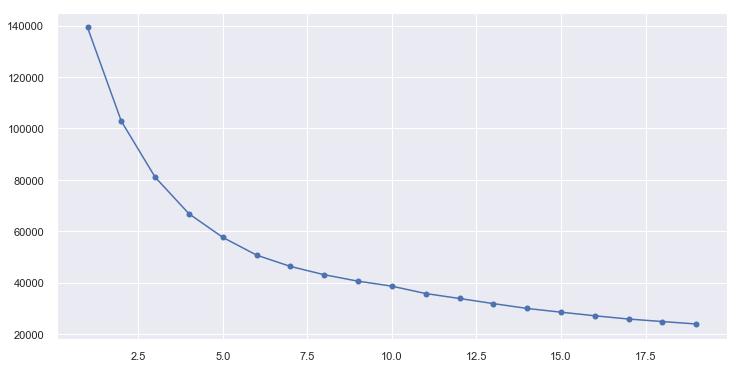

In [51]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

- Using graph we can see that Elbow range is 4, 5, 6

In [52]:
from sklearn import metrics

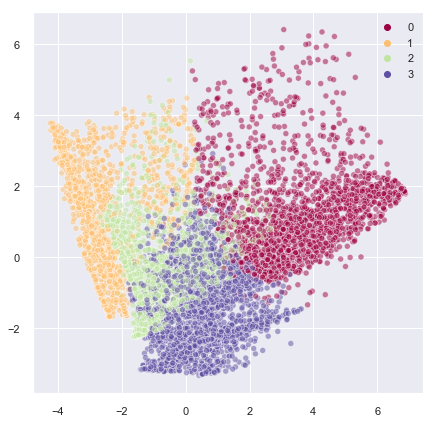

In [53]:
plt.figure(figsize=(7,7))
sns.scatterplot(reduced_cr[:,0], reduced_cr[:,1],  hue= km_4.labels_, palette='Spectral', alpha=0.5 )

In [54]:
pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(8)])
pair_plot['Cluster']=km_4.labels_
pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,Cluster
0,-1.061588,-2.450144,-0.249233,-0.051818,0.211910,0.004788,-0.101276,-0.697283,3
1,-3.182093,1.400298,-0.433445,1.108182,-0.567546,0.301950,-0.196392,-0.306963,1
2,0.859283,0.028670,2.481261,-2.083488,1.053096,-0.110747,-0.959542,-0.878937,2
3,-0.714329,-0.539490,2.697378,-0.337359,0.811421,0.167349,1.263549,-0.047714,2
4,-1.604835,-0.785440,1.567451,-1.881393,0.333662,0.327835,-0.018806,1.269360,2


C:\Users\nikhi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


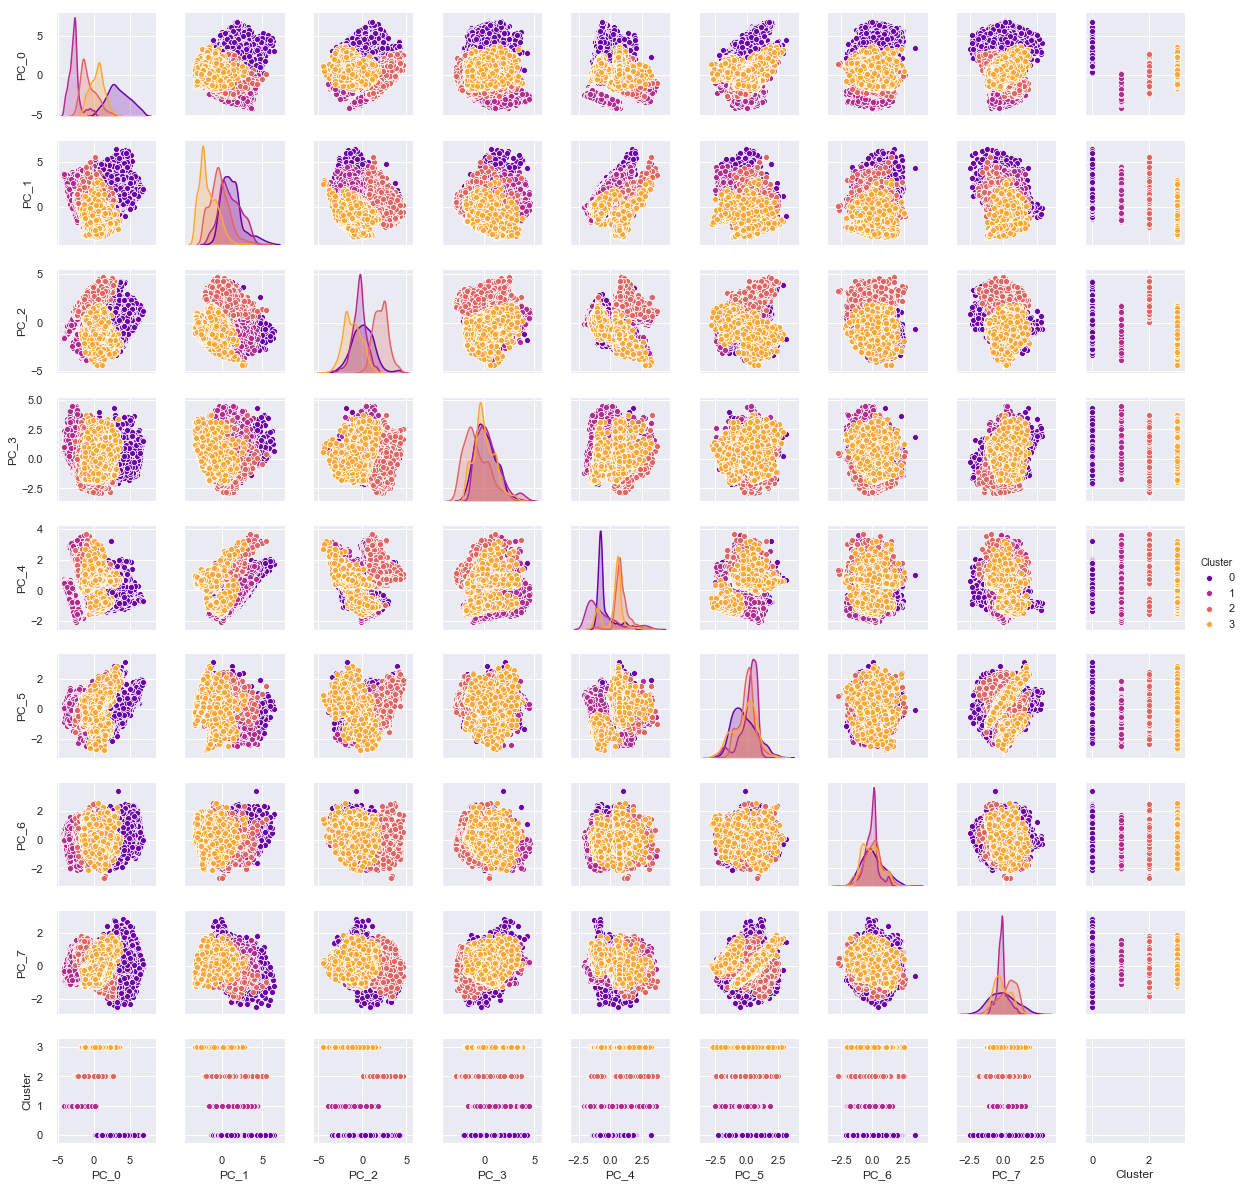

In [55]:
sns.pairplot(pair_plot,hue='Cluster', palette= 'plasma', diag_kind='kde',size=1.85)

In [56]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','Both', 'Installment_Purchases',
       'None', 'One_Of','CREDIT_LIMIT']

In [57]:
cluster_4=pd.concat([credit_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [58]:
cluster_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,Both,Installment_Purchases,None,One_Of,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,1,0,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,0,1,7500.0,2
3,1,124.916667,17.149001,0.222223,1,2.170495,0,0,0,1,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,0,1,1200.0,2


In [59]:
cluster_4=cluster_4.groupby('Cluster_4').mean().T
cluster_4.to_excel(writer, 'CC_Clusters', index=True)
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,44.753165,1.215452,6.357350,11.625797
Monthly_avg_purchase,269.977551,6.568120,65.360280,46.212888
Monthly_cash_advance,63.009895,216.001566,45.119212,20.147447
limit_usage,0.340510,0.586560,0.361508,0.262293
CASH_ADVANCE_TRX,2.460443,7.914775,1.570598,0.650248
payment_minpay,9.046176,8.843498,5.449947,11.587169
Both,0.975738,0.081243,0.031377,0.236003
Installment_Purchases,0.004219,0.038232,0.000000,0.763997
None,0.000000,0.813222,0.000000,0.000000
One_Of,0.020042,0.067304,0.968623,0.000000


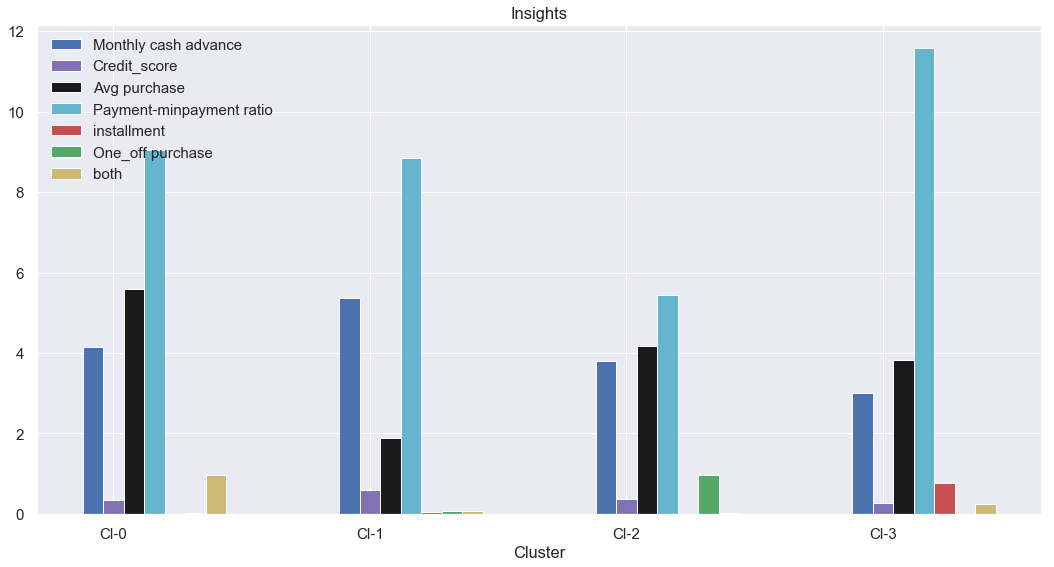

In [60]:
def graph_Cluster_4():

    sns.set(font_scale=1.369)
    fig,ax=plt.subplots(figsize=(18,9))
    index=np.arange(len(cluster_4.columns))

    cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
    credit_score=(cluster_4.loc['limit_usage',:].values)
    purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values) 
    payment=cluster_4.loc['payment_minpay',:].values
    installment=cluster_4.loc['Installment_Purchases',:].values
    one_off=cluster_4.loc['One_Of',:].values
    both=cluster_4.loc['Both',:].values
    #log is taken to neutralise long gaos in data, comapring becomes easier

    bar_width=.08
    b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
    b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
    b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
    b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
    b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
    b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
    b7=plt.bar(index+6*bar_width,both,color='y',label='both',width=bar_width)

    plt.xlabel("Cluster")
    plt.title("Insights")
    plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
    plt.legend(loc=2)
    
graph_Cluster_4()

In [63]:
# Percentage of each cluster in the total customer base
df=pd.DataFrame(km_4.labels_, columns={'cluster' : 0})
cluster_p=(df['cluster'].value_counts()*100/df.shape[0]).round(2).reset_index()
cluster_p.to_excel(writer, 'cluster_perc', index=True)
cluster_p

,index,cluster
0,3,31.53
1,1,28.06
2,0,21.18
3,2,19.23


<h2> **Insights**

<h3> Clusters are clearly distinguishing behavior within customers</h3>

<big>

- Cluster 0 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. They are second highest in paying dues. *** This group is about 21% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 28% of the total customer base ***



- Cluster 2 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 20% of the total customer base ***



- Cluster 3 customers have better credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 31% of the total customer base ***


<h2> Strategy to Target Customers: </h2>

<h3> a. Group 0 </h3>
<big> They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score) <br /> <br />
       1. We can increase credit limit or can lower down interest rate <br /> 
       2. Can be given premium card /loyality cards to increase transactions </big>
       
<h3> b. Group 1 </h3>
<big> They have poor credit score and taking only cash on advance. We can target them by providing less interest rates on purchase transactions, initially offering no cost emi to begin with.  </big>
   
<h3> c. Group 2 </h3>
    <big> This group is has least paying ratio and using card for just one off transactions (possibly bills-telephone, food, small purchases, electricity bills, water bills, travel card recharges, emergency ). According to cunsumer phycology, these kind of customers play a little more safe and do not easily spend based on offers given </big>
   
<h3> d. Group 3  </h3>
<big> This group contains responsible consumers among all as cutomers are maintaining good credit score and paying dues on time.
      Giving rewards point will make them perform more purchases. Increasing Limit is less risky  as they have good track record.
</big>

 <h2> We can repeat the above steps for 5 clusters to see if we get any improvements in insights to suggest even good marketting strategy

In [64]:
km_5=KMeans(n_clusters=5,random_state=101)
km_5.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [65]:
km_5.labels_

array([2, 1, 3, ..., 2, 1, 3])

In [66]:
pd.Series(km_5.labels_).value_counts()

1    2276
2    2173
3    1712
4    1698
0    1091
dtype: int64

Text(0, 0.5, 'PC_1')

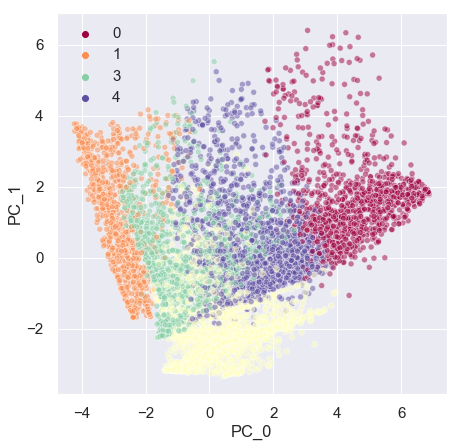

In [67]:
plt.figure(figsize=(7,7))
sns.scatterplot(reduced_cr[:,0], reduced_cr[:,1],  hue= km_5.labels_, palette='Spectral', alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [68]:
cluster_5=pd.concat([credit_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [69]:
cluster_5=cluster_5.groupby('Cluster_5').mean().T
cluster_5.to_excel(writer, 'Cluster_5', index=True )
cluster_5

Cluster_5,0,1,2,3,4
PURCHASES_TRX,58.515124,0.434974,12.132996,6.102220,17.674323
Monthly_avg_purchase,382.666413,2.545043,47.845303,61.314357,81.889399
Monthly_cash_advance,60.617389,207.713864,24.496279,56.498288,63.313983
limit_usage,0.298347,0.584557,0.255878,0.366344,0.377887
CASH_ADVANCE_TRX,2.309808,7.455624,0.713760,1.995327,2.721437
payment_minpay,12.191379,9.473053,13.723211,5.298043,4.525130
Both,0.950504,0.017135,0.000000,0.000000,1.000000
Installment_Purchases,0.000917,0.037786,1.000000,0.000000,0.000000
None,0.000000,0.897188,0.000000,0.000000,0.000000
One_Of,0.048579,0.047891,0.000000,1.000000,0.000000


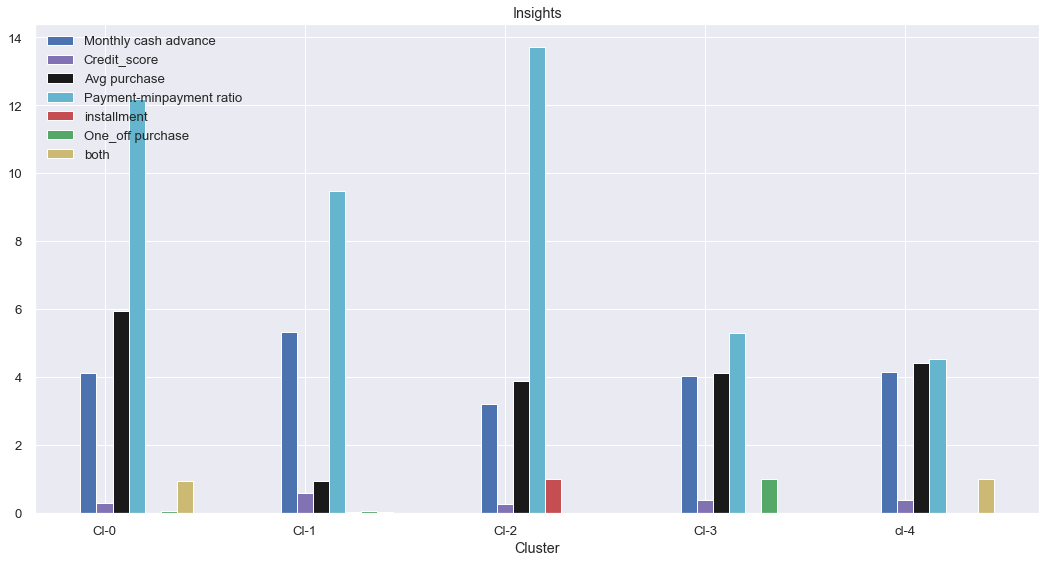

In [70]:
sns.set(font_scale=1.2)
fig,ax=plt.subplots(figsize=(18,9))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['Monthly_avg_purchase',:].values) 
payment=cluster_5.loc['payment_minpay',:].values
installment=cluster_5.loc['Installment_Purchases',:].values
one_off=cluster_5.loc['One_Of',:].values
both=cluster_5.loc['Both',:].values
#log is taken to neutralise long gaps in data, comapring becomes easier

bar_width=.08
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)
b7=plt.bar(index+6*bar_width,both,color='y',label='both',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3', 'cl-4'))
plt.legend(loc=2)


<big> cl 2, cl 3, cl4 all have similar monthly avg purchase  
cl0 and cl4 have both kind of purchases
clo and cl2 both have good credit score similar minpayment ratio

This suggests clusters are overlapping, we can treat n_clusters=4 as final

<h2> Suggested Strategy: </h2>

<h3> a. Group 0 </h3>
<big> They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       1. We can increase credit limit or can lower down interest rate
       2. Can be given premium card /loyality cards to increase transactions </big>
       
<h3> b. Group 1 </h3>
<big> They have poor credit score and taking only cash on advance. We can target them by providing less interest rates on purchase transactions, initially offering no cot emi to begin with </big>
   
<h3> c. Group 2 </h3>
    <big> This group is has minimum paying ratio and using card for just one off transactions (possibly bills-telephone, food, small purchases, electricity bills, water bills, travel card recharges, emergency ). According to cunsumer phycology, these kind of customers play a little more safe and do not easily spend based on offers given </big>
   
<h3> d. Group 3  </h3>
<big> This group contains responsible consumers among all as cutomers are maintaining good credit score and paying dues on time.
      Giving rewards point will make them perform more purchases. Increasing Limit is less risky  as they have good track record.
</big>





<h1> Strategy Visualised

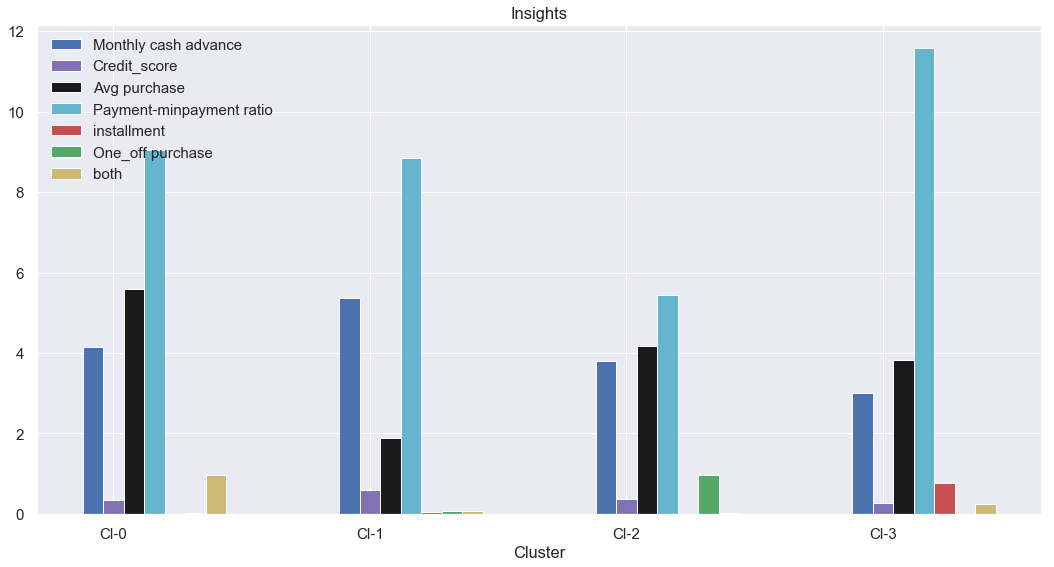

In [71]:
graph_Cluster_4()

In [72]:
writer.save()

<h1> <big>----------------------------------------------------------------------------------------------